In [316]:
import pandas as pd
import numpy as np


In [387]:
# make a list of the csv files from the directory
import os


dataframes = []
path = r'C:\Users\mbajd\machine_learninr_lectures'
files = os.listdir(path)
files_csv = sorted([f for f in files if f[-3:] == 'csv'])

# load second file to a dataframe
df = pd.read_csv(files_csv[0])
df1 = pd.read_csv(files_csv[1])
df2 = pd.read_csv(files_csv[2])

dataframes = [df, df1, df2]

In [388]:
files_csv

['2020Q1Q2Q3Q4-2021Q1 - Brazil - Minerva SA_Brazil (BEEF3).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Egypt - Medinet Nasr Housing (MNHD).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Russia - Sberbank Rossii PAO (SBER).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Turkey - Koc Holding AS (KCHOL).csv']

In [389]:
print(files_csv[2])

2020Q1Q2Q3Q4-2021Q1 - Russia - Sberbank Rossii PAO (SBER).csv


In [390]:
dataframes[2].tail()

,Date,Price,Open,High,Low,Vol.,Change %
307,"Jan 09, 2020",257.99,259.4,261.76,257.01,38.33M,-0.45%
308,"Jan 08, 2020",259.15,253.57,259.15,253.03,40.82M,2.07%
309,"Jan 06, 2020",253.9,254.75,254.84,251.4,22.35M,-0.43%
310,"Jan 03, 2020",255,255.99,258.19,253.7,35.85M,0.10%
311,Highest: 296.07,Lowest: 172.15,Difference: 123.92,Average: 234.52,Change %: 14.24,NaN,NaN


In [391]:
# delete the last row of dataframes
for df in dataframes:
    df.drop(df.tail(1).index, inplace=True)


In [392]:
# convert to datetime format of Date columns in dataframes (df,df1,df2)
for df in dataframes:
    df['Date'] = pd.to_datetime(df['Date'])
    

In [393]:
# sort the columns from the earliest to the most recent date
for df in dataframes:
    df.sort_values(by=['Date'], inplace=True)

In [394]:
df.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [395]:
df.shape

(311, 7)

In [396]:
# disable pandas warnings
pd.options.mode.chained_assignment = None

In [397]:
dataframes[1].dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [398]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [399]:
import pandas as pd

# Loop through dataframes and convert columns to float using pd.to_numeric
for df in dataframes:
    df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
    df['High'] = pd.to_numeric(df['High'], errors='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
    
    # Check if the 'Price' column exists in the dataframe before converting it to float
    if 'Price' in df.columns:
        df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [400]:
dataframes[2].dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [401]:
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [402]:
# reset index of dataframes
for df in dataframes:
    df.reset_index(drop=True, inplace=True)

In [403]:
for df in dataframes:
    print(df.head())

        Date  Price   Open   High    Low   Vol. Change %
0 2020-01-02  12.57  12.88  12.99  12.57  5.78M   -2.10%
1 2020-01-03  12.90  12.45  12.93  12.27  4.88M    2.63%
2 2020-01-06  12.89  12.90  12.91  12.57  4.17M   -0.08%
3 2020-01-07  13.48  13.03  13.48  13.03  8.20M    4.58%
4 2020-01-08  13.63  13.50  13.68  13.18  6.18M    1.11%
        Date  Price  Open  High   Low     Vol. Change %
0 2020-01-02   4.81  4.81  4.87  4.78  241.60K   -0.21%
1 2020-01-05   4.41  4.70  4.70  4.33    3.76M   -8.32%
2 2020-01-06   4.28  4.16  4.44  4.12    2.52M   -2.95%
3 2020-01-08   4.41  4.19  4.59  4.15    3.52M    3.04%
4 2020-01-09   4.62  4.55  4.70  4.55    2.09M    4.76%
        Date   Price    Open    High     Low    Vol. Change %
0 2020-01-03  255.00  255.99  258.19  253.70  35.85M    0.10%
1 2020-01-06  253.90  254.75  254.84  251.40  22.35M   -0.43%
2 2020-01-08  259.15  253.57  259.15  253.03  40.82M    2.07%
3 2020-01-09  257.99  259.40  261.76  257.01  38.33M   -0.45%
4 2020-01-10

## Lets see the  data

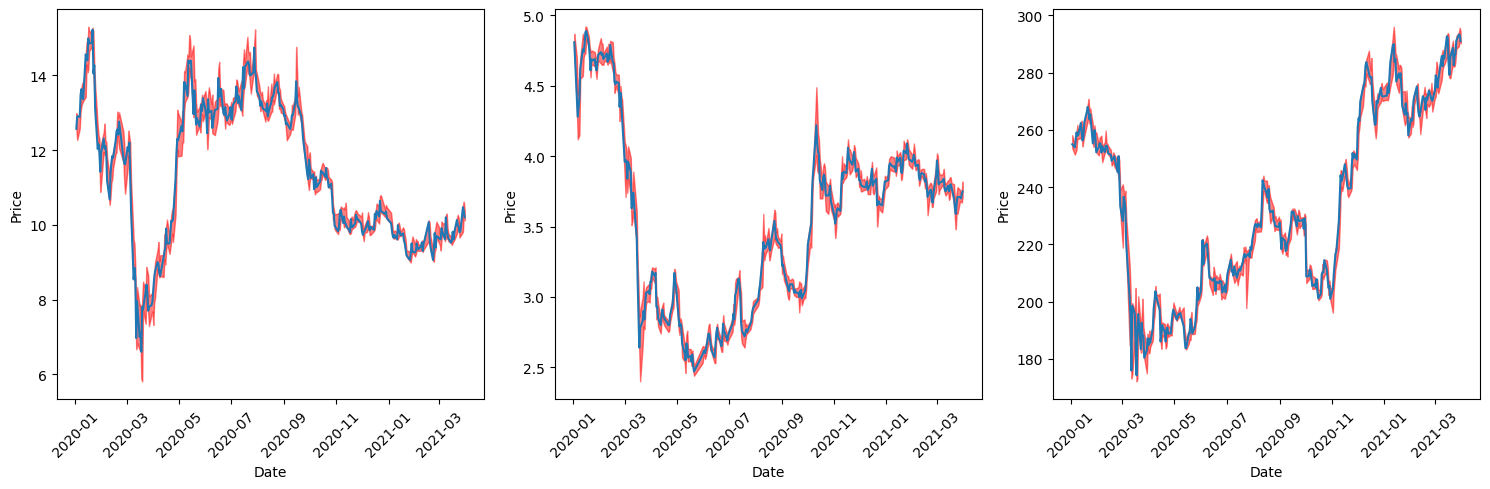

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the columns on one plot Price and High, Low as the highest and lowest values in the plot against the Date for all the 3 dataframes in subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# DataFrame 'df'
sns.lineplot(ax=ax[0], data=dataframes[0], x='Date', y='Price')
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-labels by 45 degrees
ax[0].fill_between(dataframes[0]['Date'], dataframes[0]['Low'], dataframes[0]['High'], color='red', alpha=0.5)
ax[0].plot(dataframes[0]['Date'], dataframes[0]['Low'], label='Low', color='blue', linewidth = 0)
ax[0].plot(dataframes[0]['Date'], dataframes[0]['High'], label='High', color='red', linewidth = 0)



# DataFrame 'dataframes[1]'
sns.lineplot(ax=ax[1], data=dataframes[1], x='Date', y='Price')
ax[1].fill_between(dataframes[1]['Date'], dataframes[1]['Low'], dataframes[1]['High'], color='red', alpha=0.5)
ax[1].plot(dataframes[1]['Date'], dataframes[1]['Low'], label='Low', color='blue', linewidth = 0)
ax[1].plot(dataframes[1]['Date'], dataframes[1]['High'], label='High', color='red', linewidth = 0)
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-labels by 45 degrees

# DataFrame 'dataframes[2]'
sns.lineplot(ax=ax[2], data=dataframes[2], x='Date', y='Price')
ax[2].tick_params(axis='x', rotation=45)  # Rotate x-labels by 45 degrees
ax[2].fill_between(dataframes[2]['Date'], dataframes[2]['Low'], dataframes[2]['High'], color='red', alpha=0.5)
ax[2].plot(dataframes[2]['Date'], dataframes[2]['Low'], label='Low', color='blue', linewidth = 0)
ax[2].plot(dataframes[2]['Date'], dataframes[2]['High'], label='High', color='red', linewidth = 0)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [427]:
# Create a function to calculate profit
def calculate_all_possible_profits(data):
    buy_indices = []
    sell_indices = []
    profits = []

    for index, row in data.iterrows():
        if row['Signal'] == 'Buy':
            buy_indices.append(index)
        elif row['Signal'] == 'Sell':
            sell_indices.append(index)
    #print(buy_indices)
    #print(sell_indices)
    for buy_index in buy_indices:
        for sell_index in sell_indices:
            if sell_index > buy_index:
                buy_price = data.at[buy_index, 'Price']
                sell_price = data.at[sell_index, 'Price']
                profit = sell_price - buy_price
                profits.append(profit)
                
    return profits

## Moving average

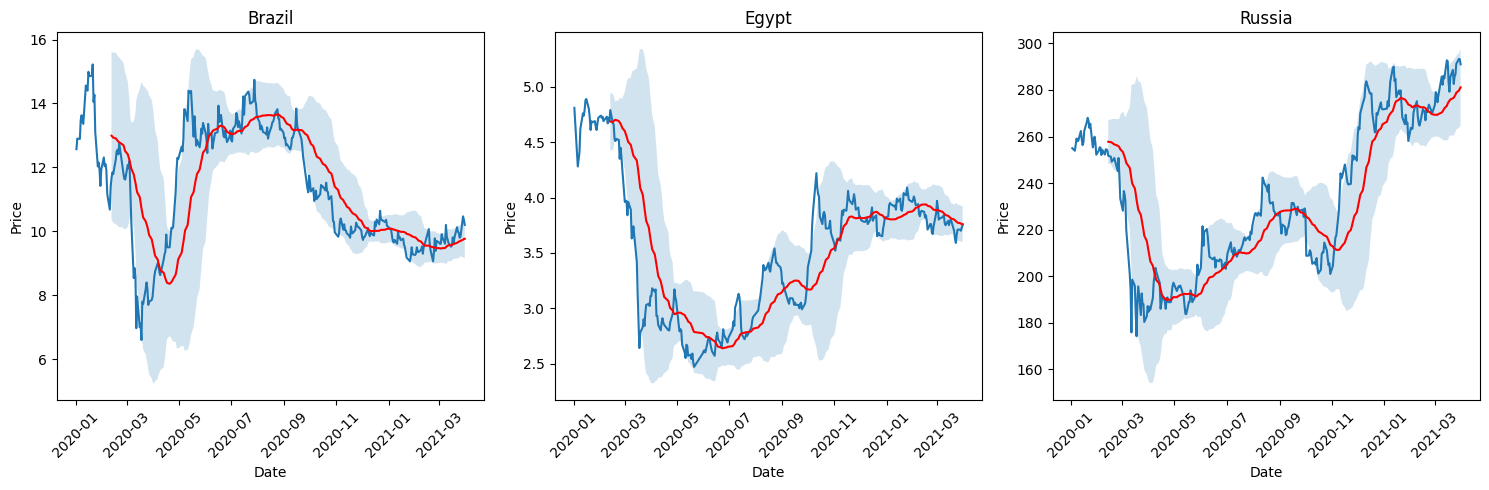

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df, df1, and dataframes[2] are your DataFrames containing the 'Date' and 'Price' columns

day = 30
std_dev = 2  # Number of standard deviations for Bollinger Bands

# Calculate the 30-day moving average for each DataFrame
dataframes[0]['MA_30'] = dataframes[0]['Price'].rolling(window=day).mean()
dataframes[1]['MA_30'] = dataframes[1]['Price'].rolling(window=day).mean()
dataframes[2]['MA_30'] = dataframes[2]['Price'].rolling(window=day).mean()

# Calculate the upper and lower Bollinger Bands for each DataFrame
dataframes[0]['Upper_BB'] = dataframes[0]['MA_30'] + std_dev * dataframes[0]['Price'].rolling(window=day).std()
dataframes[0]['Lower_BB'] = dataframes[0]['MA_30'] - std_dev * dataframes[0]['Price'].rolling(window=day).std()

dataframes[1]['Upper_BB'] = dataframes[1]['MA_30'] + std_dev * dataframes[1]['Price'].rolling(window=day).std()
dataframes[1]['Lower_BB'] = dataframes[1]['MA_30'] - std_dev * dataframes[1]['Price'].rolling(window=day).std()

dataframes[2]['Upper_BB'] = dataframes[2]['MA_30'] + std_dev * dataframes[2]['Price'].rolling(window=day).std()
dataframes[2]['Lower_BB'] = dataframes[2]['MA_30'] - std_dev * dataframes[2]['Price'].rolling(window=day).std()

# Function to generate the 'Signal' column based on the Bollinger Bands
def get_signal(row):
    if row['Price'] > row['Upper_BB']:
        return 'Sell'
    elif row['Price'] < row['Lower_BB']:
        return 'Buy'
    else:
        return 'Hold'

# Apply the 'get_signal' function to each row in the DataFrames
dataframes[0]['Signal'] = dataframes[0].apply(get_signal, axis=1)
dataframes[1]['Signal'] = dataframes[1].apply(get_signal, axis=1)
dataframes[2]['Signal'] = dataframes[2].apply(get_signal, axis=1)

# Plot the data with Bollinger Bands and the 'Signal' column
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# DataFrame 'df'
sns.lineplot(ax=ax[0], data=dataframes[0], x='Date', y='Price')
ax[0].plot(dataframes[0]['Date'], dataframes[0]['MA_30'], color='red', label=f'{day}-day Moving Average')
ax[0].fill_between(dataframes[0]['Date'], dataframes[0]['Upper_BB'], dataframes[0]['Lower_BB'], alpha=0.2)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Brazil')

# DataFrame 'dataframes[1]'
sns.lineplot(ax=ax[1], data=dataframes[1], x='Date', y='Price')
ax[1].plot(dataframes[1]['Date'], dataframes[1]['MA_30'], color='red', label=f'{day}-day Moving Average')
ax[1].fill_between(dataframes[1]['Date'], dataframes[1]['Upper_BB'], dataframes[1]['Lower_BB'], alpha=0.2)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Egypt')

# DataFrame 'dataframes[2]'
sns.lineplot(ax=ax[2], data=dataframes[2], x='Date', y='Price')
ax[2].plot(dataframes[2]['Date'], dataframes[2]['MA_30'], color='red', label=f'{day}-day Moving Average')
ax[2].fill_between(dataframes[2]['Date'], dataframes[2]['Upper_BB'], dataframes[2]['Lower_BB'], alpha=0.2)
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('Russia')

plt.tight_layout()

plt.show()


In [429]:
# Display the signals for each DataFrame
print("DataFrame df - Signals:")
print(df[['Date', 'Price', 'Signal']].tail(120))

#print("\nDataFrame df1 - Signals:")
#print(df1[['Date', 'Price', 'Signal']].tail(20))

#print("\nDataFrame df2 - Signals:")
#print(df2[['Date', 'Price', 'Signal']].tail(20))

DataFrame df - Signals:
          Date  Price Signal
189 2020-10-02  11.25   Hold
190 2020-10-05  11.35   Hold
191 2020-10-06  10.95    Buy
192 2020-10-07  11.03   Hold
193 2020-10-08  11.27   Hold
..         ...    ...    ...
304 2021-03-25   9.80   Hold
305 2021-03-26   9.83   Hold
306 2021-03-29  10.47   Sell
307 2021-03-30  10.36   Sell
308 2021-03-31  10.20   Hold

[120 rows x 3 columns]


In [430]:
print(df[df['Signal'] == 'Buy'][['Date', 'Price','Signal']])

          Date  Price Signal
44  2020-03-06  10.40    Buy
45  2020-03-09   8.54    Buy
46  2020-03-10   8.85    Buy
47  2020-03-11   8.56    Buy
48  2020-03-12   6.97    Buy
49  2020-03-13   7.96    Buy
50  2020-03-16   7.00    Buy
51  2020-03-17   7.11    Buy
52  2020-03-18   6.60    Buy
182 2020-09-23  12.33    Buy
183 2020-09-24  12.14    Buy
184 2020-09-25  11.95    Buy
185 2020-09-28  11.35    Buy
186 2020-09-29  11.22    Buy
191 2020-10-06  10.95    Buy
208 2020-10-30   9.97    Buy
209 2020-11-03   9.83    Buy
262 2021-01-21   9.34    Buy
263 2021-01-22   9.18    Buy
264 2021-01-26   9.06    Buy


In [431]:
# Calculate profit for each DataFrame
profit_brazil = calculate_all_possible_profits(df)
profit_egypt = calculate_all_possible_profits(df1)
profit_russia = calculate_all_possible_profits(df2)


# Print the profits
print("Profit for Brazil:", sum(profit_brazil))
print("Profit for Egypt:", sum(profit_egypt))
print("Profit for Russia:", sum(profit_russia))


Profit for Brazil: 713.7199999999995
Profit for Egypt: -36.719999999999956
Profit for Russia: 10556.480000000003


## Exponential smoothing

In [432]:
dataframes[2]

,Date,Price,Open,High,Low,Vol.,Change %,MA_30,Exponential_Smoothing,Std_dev,Upper_Band,Lower_Band,Signal,Upper_BB,Lower_BB
0,2020-01-03,255.00,255.99,258.19,253.70,35.85M,0.10%,NaN,NaN,NaN,NaN,NaN,Hold,NaN,NaN
1,2020-01-06,253.90,254.75,254.84,251.40,22.35M,-0.43%,NaN,NaN,NaN,NaN,NaN,Hold,NaN,NaN
2,2020-01-08,259.15,253.57,259.15,253.03,40.82M,2.07%,NaN,NaN,NaN,NaN,NaN,Hold,NaN,NaN
3,2020-01-09,257.99,259.40,261.76,257.01,38.33M,-0.45%,NaN,NaN,NaN,NaN,NaN,Hold,NaN,NaN
4,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.08%,NaN,NaN,NaN,NaN,NaN,Hold,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2021-03-25,286.66,286.50,287.03,283.85,35.22M,0.30%,277.946000,277.539770,7.993083,293.932165,261.959835,Hold,293.932165,261.959835
307,2021-03-26,291.22,288.63,292.75,288.32,56.07M,1.59%,278.830000,278.313908,7.943965,294.717929,262.942071,Hold,294.717929,262.942071
308,2021-03-29,293.30,289.72,294.09,289.26,43.68M,0.71%,279.740000,279.169563,7.987101,295.714202,263.765798,Hold,295.714202,263.765798
309,2021-03-30,293.25,294.86,295.72,291.50,38.81M,-0.02%,280.454667,279.940625,8.209188,296.873043,264.036290,Hold,296.873043,264.036290


In [484]:
df = dataframes[0]
df1 = dataframes[1]
df2 = dataframes[2]


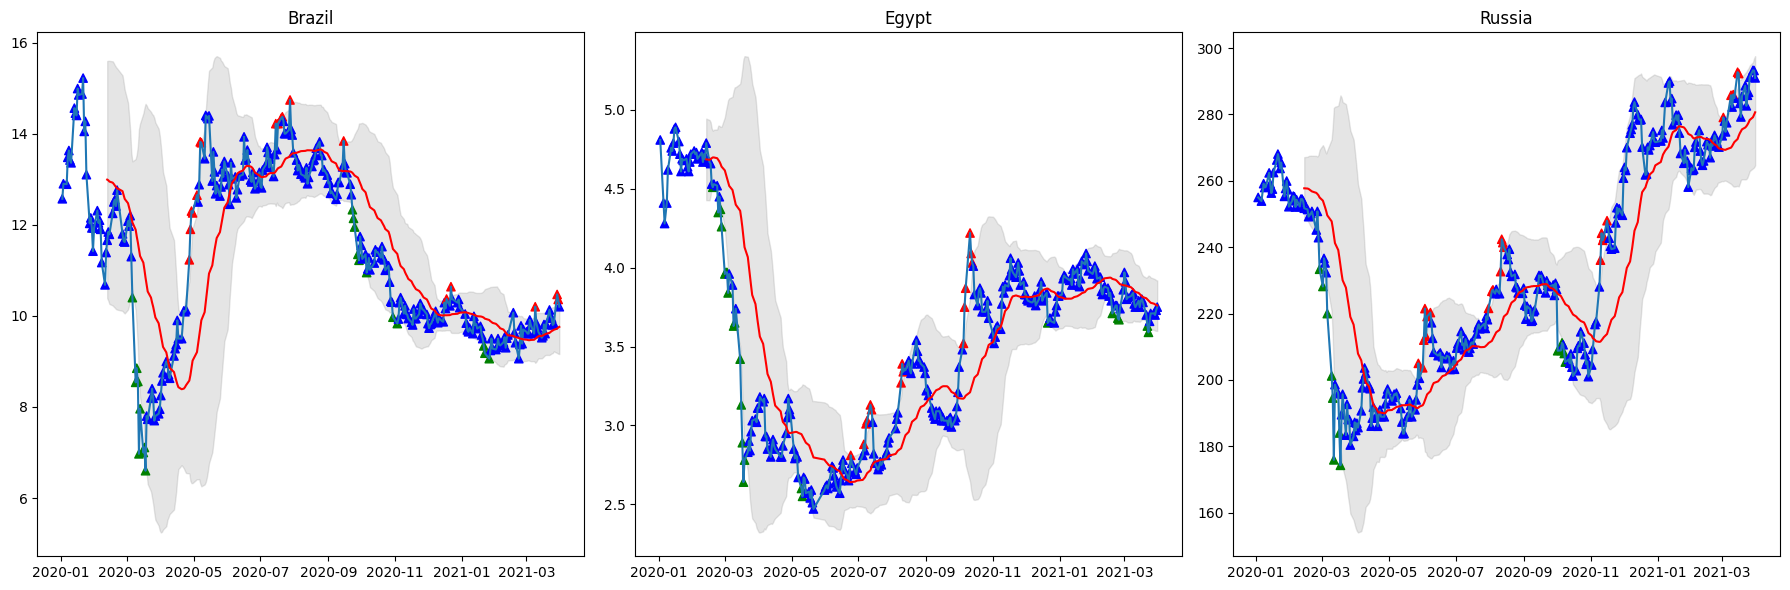

In [434]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a custom colormap to map the signals to colors
signal_colors = {'Buy': 'green', 'Sell': 'red', 'Hold': 'blue'}

# Function to calculate moving average and exponential smoothing
def calculate_moving_average_and_smoothing(data, day, alpha):
    data['MA_30'] = data['Price'].rolling(window=day).mean()
    data['Exponential_Smoothing'] = data['MA_30'].ewm(alpha=alpha, adjust=False).mean()
    data['Std_dev'] = data['Price'].rolling(window=day).std()
    data['Upper_Band'] = data['MA_30'] + 2 * data['Std_dev']
    data['Lower_Band'] = data['MA_30'] - 2 * data['Std_dev']
    data['Signal'] = 'Hold'
    data.loc[data['Price'] > data['Upper_Band'], 'Signal'] = 'Sell'
    data.loc[data['Price'] < data['Lower_Band'], 'Signal'] = 'Buy'

# Assuming you have df, df1, and df2 as your DataFrames
day = 30
alpha = 0.6

# Calculate moving average, exponential smoothing, and add Bollinger Bands and Signals for each DataFrame
calculate_moving_average_and_smoothing(df, day, alpha)
calculate_moving_average_and_smoothing(df1, day, alpha)
calculate_moving_average_and_smoothing(df2, day, alpha)

# Create a 1x3 subplots grid
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first DataFrame (df)
axs[0].plot(df['Date'], df['Price'], label='Price')
axs[0].plot(df['Date'], df['Exponential_Smoothing'], color='red', label=f'{day}-day Moving Average with Exponential Smoothing')
axs[0].fill_between(df['Date'], df['Upper_Band'], df['Lower_Band'], alpha=0.2, color='gray', label='Bollinger Bands')
axs[0].scatter(df['Date'], df['Price'], c=df['Signal'].map(signal_colors), marker='^', label='Signal')
axs[0].set_title('Brazil')

# Plot the second DataFrame (df1)
axs[1].plot(df1['Date'], df1['Price'], label='Price')
axs[1].plot(df1['Date'], df1['Exponential_Smoothing'], color='red', label=f'{day}-day Moving Average with Exponential Smoothing')
axs[1].fill_between(df1['Date'], df1['Upper_Band'], df1['Lower_Band'], alpha=0.2, color='gray', label='Bollinger Bands')
axs[1].scatter(df1['Date'], df1['Price'], c=df1['Signal'].map(signal_colors), marker='^', label='Signal')
axs[1].set_title('Egypt')

# Plot the third DataFrame (df2)
axs[2].plot(df2['Date'], df2['Price'], label='Price')
axs[2].plot(df2['Date'], df2['Exponential_Smoothing'], color='red', label=f'{day}-day Moving Average with Exponential Smoothing')
axs[2].fill_between(df2['Date'], df2['Upper_Band'], df2['Lower_Band'], alpha=0.2, color='gray', label='Bollinger Bands')
axs[2].scatter(df2['Date'], df2['Price'], c=df2['Signal'].map(signal_colors), marker='^', label='Signal')
axs[2].set_title('Russia')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [436]:
# Calculate profit for each DataFrame
profit_brazil = calculate_all_possible_profits(df)
profit_egypt = calculate_all_possible_profits(df1)
profit_russia = calculate_all_possible_profits(df2)


# Print the profits
print("Profit for Brazil:", sum(profit_brazil))
print("Profit for Egypt:", sum(profit_egypt))
print("Profit for Russia:", sum(profit_russia))


Profit for Brazil: 713.7199999999995
Profit for Egypt: -36.719999999999956
Profit for Russia: 10556.480000000003


## ARIMA

In [245]:
new_data = df # choose which dataframe to choose

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

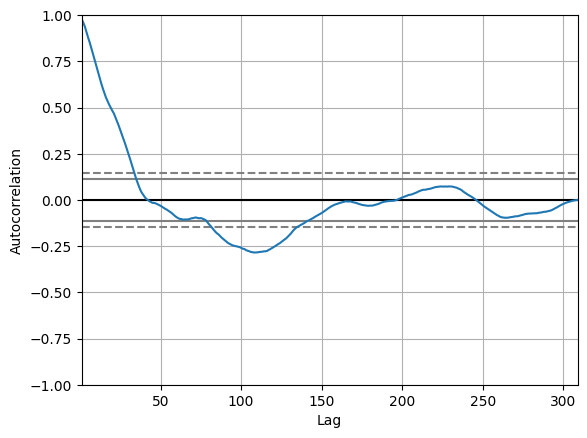

In [246]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(new_data['Price'])


In [247]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(new_data['Price'], order=(1,1,2))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  309
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -137.125
Date:                Sat, 29 Jul 2023   AIC                            282.249
Time:                        11:19:14   BIC                            297.170
Sample:                             0   HQIC                           288.215
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4296      0.154      2.782      0.005       0.127       0.732
ma.L1         -0.5476      0.145     -3.771      0.000      -0.832      -0.263
ma.L2          0.2168      0.054      4.023      0.0

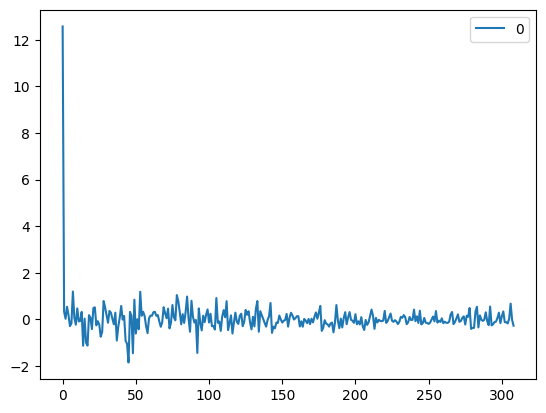

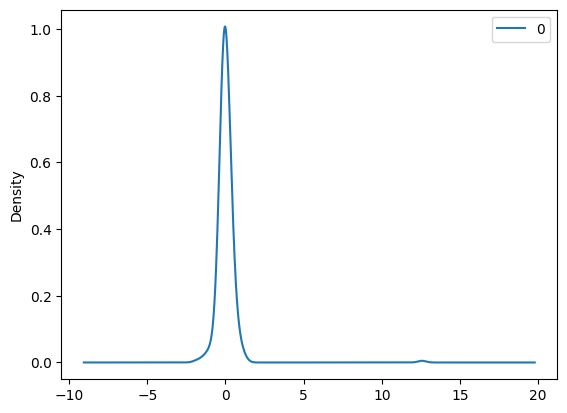

                0
count  309.000000
mean     0.034236
std      0.808980
min     -1.848088
25%     -0.168091
50%     -0.023159
75%      0.181759
max     12.570000


In [248]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [249]:
# Assuming df is your DataFrame containing the 'Date' and 'Price' columns
# Set 'Date' as the index for the DataFrame
new_data.set_index('Date', inplace=True)

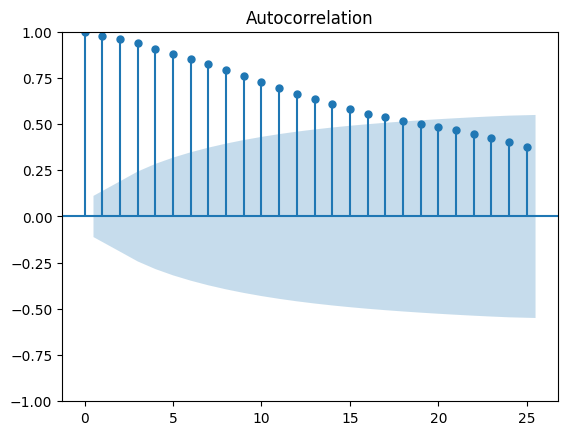

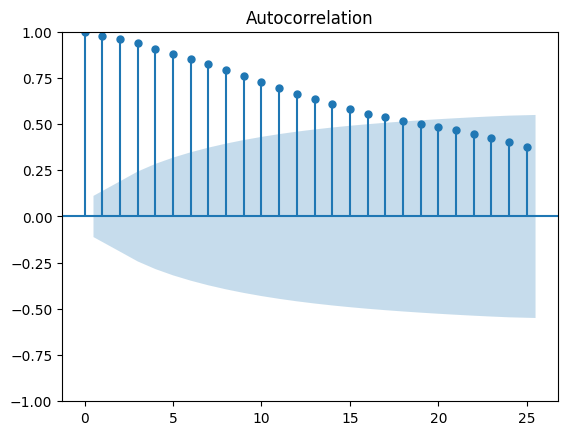

In [250]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels as sm


plot_acf(new_data['Price'])

### First order differencing for the autocorrelation

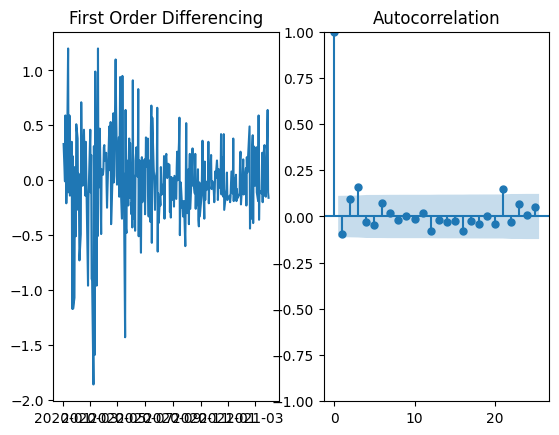

In [251]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('First Order Differencing')
ax1.plot(new_data['Price'].diff())

ax2 = f.add_subplot(122)
plot_acf(new_data['Price'].diff().dropna(), ax=ax2)
plt.show()

### Second order differencing for the autocorrelation

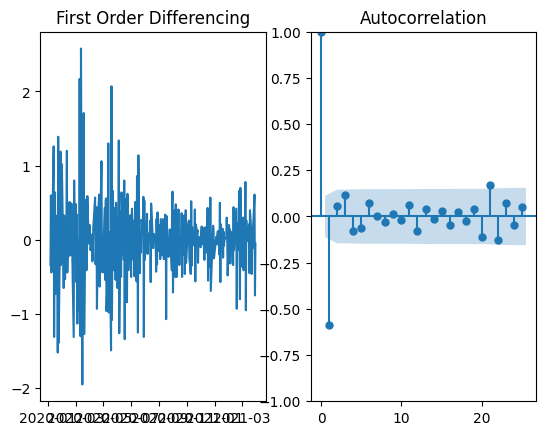

In [252]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('First Order Differencing')
ax1.plot(new_data['Price'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(new_data['Price'].diff().diff().dropna(), ax=ax2)
plt.show()

### Augmented Dickey-Fuller test

In [253]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(new_data['Price'].dropna())
print('p-value:', result[1])

result = adfuller(new_data['Price'].diff().dropna())
print('p-value:', result[1])

result = adfuller(new_data['Price'].diff().diff().dropna())
print('p-value:', result[1])

p-value: 0.18390623701557407
p-value: 6.858473426850698e-13
p-value: 7.906932337040309e-15


In [254]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(endog=new_data['Price'], order=(1, 1, 2))
model = arima_model.fit()
print(model.summary())  

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  309
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -137.125
Date:                Sat, 29 Jul 2023   AIC                            282.249
Time:                        11:19:19   BIC                            297.170
Sample:                             0   HQIC                           288.215
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4296      0.154      2.782      0.005       0.127       0.732
ma.L1         -0.5476      0.145     -3.771      0.000      -0.832      -0.263
ma.L2          0.2168      0.054      4.023      0.0

c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

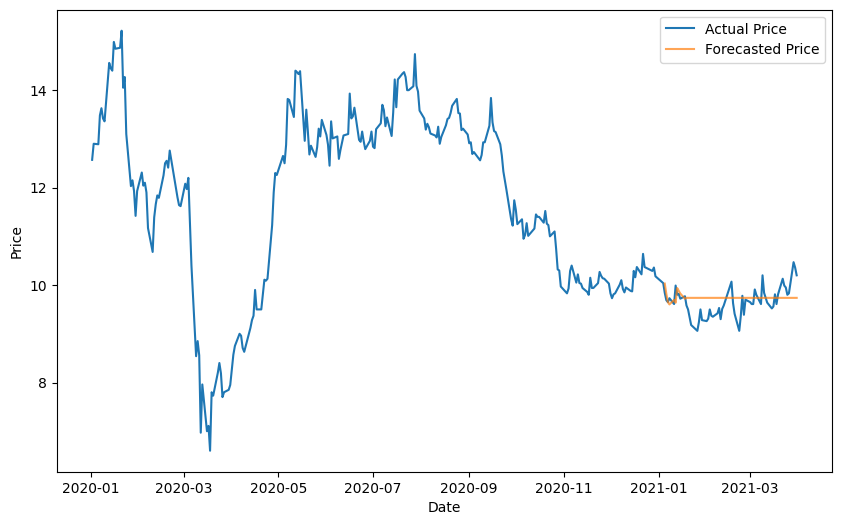

P-values of the fitted model:
ar.L1     8.590842e-03
ma.L1     2.408401e-04
ma.L2     4.564248e-05
sigma2    2.409535e-60
dtype: float64


In [255]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas library for DataFrame operations
from dateutil.relativedelta import relativedelta

# Assuming you have imported the required libraries and loaded your data.
df_model = new_data['Price'][0:260]  # Use the first 260 data points for training
# Fit the ARIMA model
model = ARIMA(df_model, order=(1, 1, 2))
fitted = model.fit()

# Predict and plot the forecast
start_index = 250  # The index from where you want to start predicting
end_index = len(new_data['Price']) - 1  # The last index of the data

# Predict using the fitted model
forecast_values = fitted.predict(start=start_index, end=end_index, alpha=0.1)

# Create a new DataFrame with forecasted values and matching index
forecast_df = pd.DataFrame(forecast_values.values, index=new_data.index[start_index:end_index+1], columns=['Forecasted Price'])

# Plot the actual data and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(new_data['Price'], label='Actual Price')
plt.plot(forecast_df, label='Forecasted Price', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Get the p-values of the fitted model
p_values = fitted.pvalues
print("P-values of the fitted model:")
print(p_values)


# Prophet

In [141]:
!pip install prophet


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [279]:
from prophet import Prophet

In [280]:

df = pd.read_csv(r'C:\Users\mbajd\machine_learninr_lectures\2020Q1Q2Q3Q4-2021Q1 - Brazil - Minerva SA_Brazil (BEEF3).csv')
data = pd.DataFrame()
# get rid of the last element of df
df = df[:-1]
# convert data to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# convert format of all columns to numeric values
for columns in df.columns[1:]:
    df[columns] = pd.to_numeric(df[columns], errors='coerce')
data['ds'] = df['Date']
data['y'] = df['Price'].astype(float)
data['ds'] = pd.to_datetime(data['ds'])
df_2020 = data[data['ds'].dt.year == 2020]

# Sort the df from the earliest date to the last
df = df.sort_values(by='Date')

In [281]:
model = Prophet()

In [282]:
model.fit(df_2020)

11:46:40 - cmdstanpy - INFO - Chain [1] start processing
11:46:40 - cmdstanpy - INFO - Chain [1] done processing


In [283]:
df_2021 = data[data['ds'].dt.year == 2021]


In [284]:
forecast = model.predict(df_2021)

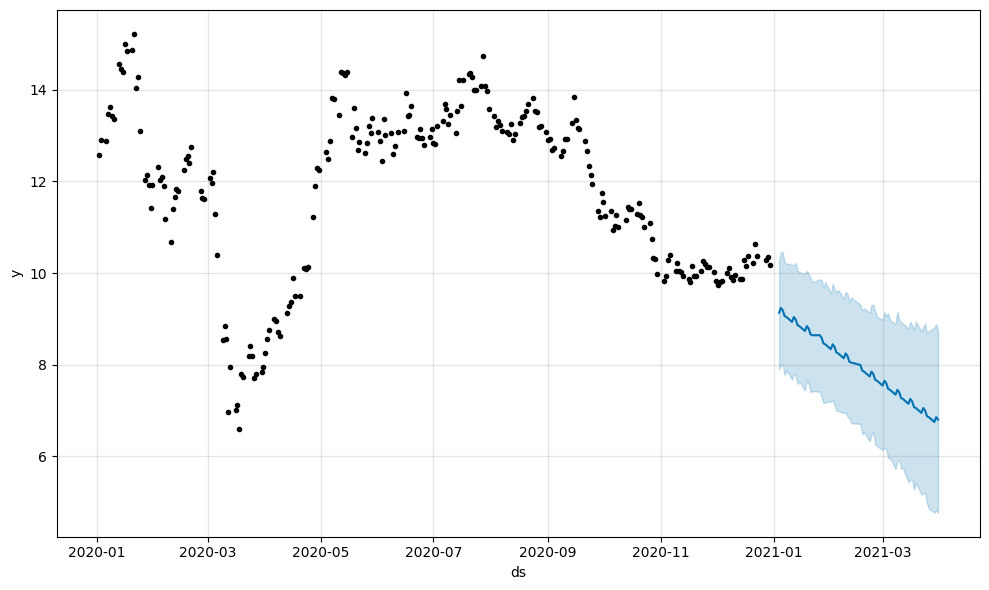

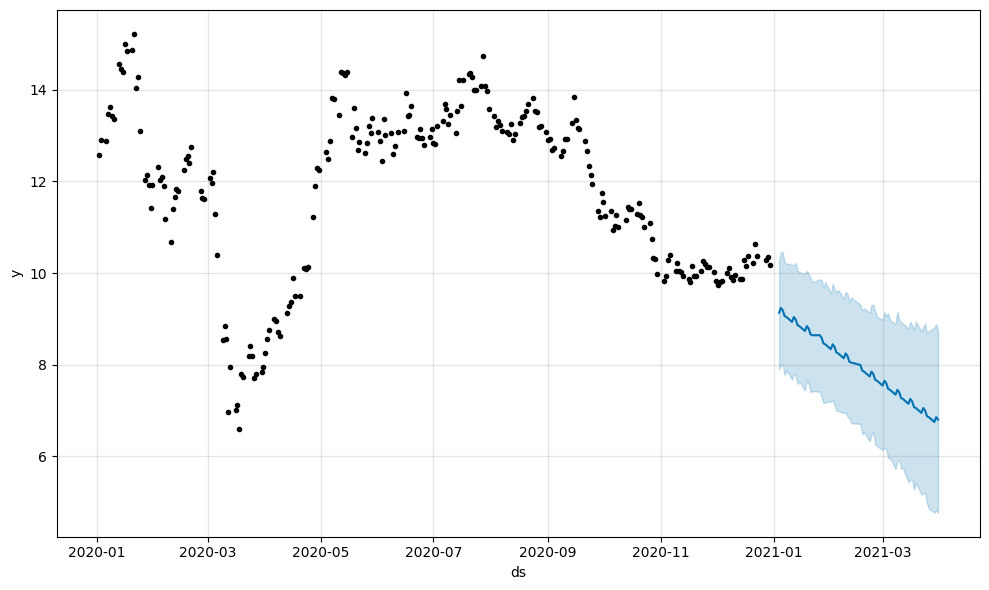

In [288]:
model.plot(forecast, uncertainty=True)

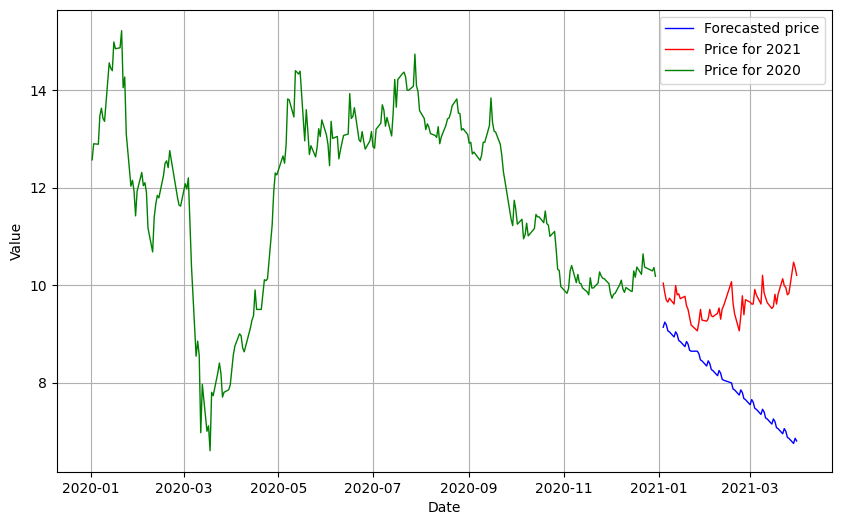

In [286]:
# Plot the time series
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(forecast['ds'], forecast['yhat'], color='blue', linestyle='-', linewidth=1, label='Forecasted price')  # Replace 'value_column' with your desired column to plot
plt.plot(df_2021['ds'], df_2021['y'], color='red', linestyle='-', linewidth=1, label='Price for 2021')
plt.plot(df_2020['ds'], df_2020['y'], color='green', linestyle='-', linewidth=1, label='Price for 2020')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# LSTM forecasting

In [498]:
# reset the index of the df
df = df.reset_index(drop=True)
df = df1

In [499]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Price'].values.reshape(-1, 1))
scaled_data = pd.DataFrame(scaled_data, columns=['Price'])
scaled_data['Date'] = df['Date']
scaled_data

,Price,Date
0,0.966942,2020-01-02
1,0.801653,2020-01-05
2,0.747934,2020-01-06
3,0.801653,2020-01-08
4,0.888430,2020-01-09
...,...,...
300,0.512397,2021-03-25
301,0.512397,2021-03-28
302,0.508264,2021-03-29
303,0.520661,2021-03-30


In [500]:
df.shape

(305, 15)

In [501]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Price(t-{i})'] = df['Price'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 30
shifted_df = prepare_dataframe_for_lstm(scaled_data, lookback)
shifted_df

,Price,Price(t-1),Price(t-2),Price(t-3),Price(t-4),Price(t-5),Price(t-6),Price(t-7),Price(t-8),Price(t-9),...,Price(t-21),Price(t-22),Price(t-23),Price(t-24),Price(t-25),Price(t-26),Price(t-27),Price(t-28),Price(t-29),Price(t-30)
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-16,0.909091,0.958678,0.917355,0.929752,0.909091,0.933884,0.921488,0.917355,0.933884,0.929752,...,1.000000,0.995868,0.958678,0.938017,0.946281,0.888430,0.801653,0.747934,0.801653,0.966942
2020-02-17,0.904959,0.909091,0.958678,0.917355,0.929752,0.909091,0.933884,0.921488,0.917355,0.933884,...,0.962810,1.000000,0.995868,0.958678,0.938017,0.946281,0.888430,0.801653,0.747934,0.801653
2020-02-18,0.851240,0.904959,0.909091,0.958678,0.917355,0.929752,0.909091,0.933884,0.921488,0.917355,...,0.929752,0.962810,1.000000,0.995868,0.958678,0.938017,0.946281,0.888430,0.801653,0.747934
2020-02-19,0.842975,0.851240,0.904959,0.909091,0.958678,0.917355,0.929752,0.909091,0.933884,0.921488,...,0.884298,0.929752,0.962810,1.000000,0.995868,0.958678,0.938017,0.946281,0.888430,0.801653
2020-02-20,0.851240,0.842975,0.851240,0.904959,0.909091,0.958678,0.917355,0.929752,0.909091,0.933884,...,0.917355,0.884298,0.929752,0.962810,1.000000,0.995868,0.958678,0.938017,0.946281,0.888430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,0.512397,0.491736,0.462810,0.479339,0.508264,0.541322,0.549587,0.545455,0.528926,0.545455,...,0.495868,0.500000,0.533058,0.533058,0.512397,0.545455,0.566116,0.557851,0.578512,0.582645
2021-03-28,0.512397,0.512397,0.491736,0.462810,0.479339,0.508264,0.541322,0.549587,0.545455,0.528926,...,0.524793,0.495868,0.500000,0.533058,0.533058,0.512397,0.545455,0.566116,0.557851,0.578512
2021-03-29,0.508264,0.512397,0.512397,0.491736,0.462810,0.479339,0.508264,0.541322,0.549587,0.545455,...,0.574380,0.524793,0.495868,0.500000,0.533058,0.533058,0.512397,0.545455,0.566116,0.557851


In [502]:
train_data = shifted_df.loc['2020-01-01':'2020-12-31']


In [503]:
train_data_as_np = train_data.to_numpy()
X = train_data_as_np[:, 1:]
y = train_data_as_np[:, 0]

X.shape, y.shape

X = dc(np.flip(X, axis=1))


In [504]:
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



# Reshape input data to fit the LSTM model requirements
X = X.reshape(X.shape[0],X.shape[1],1)
print(X.shape)
#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X, y, epochs=25, batch_size=16)


(213, 30, 1)
Epoch 1/25
14/14 [==============================] - 5s 13ms/step - loss: 0.1413
Epoch 2/25
14/14 [==============================] - 0s 13ms/step - loss: 0.0220
Epoch 3/25
14/14 [==============================] - 0s 13ms/step - loss: 0.0171
Epoch 4/25
14/14 [==============================] - 0s 13ms/step - loss: 0.0133
Epoch 5/25
14/14 [==============================] - 0s 13ms/step - loss: 0.0128
Epoch 6/25
14/14 [==============================] - 0s 13ms/step - loss: 0.0111
Epoch 7/25
14/14 [==============================] - 0s 13ms/step - loss: 0.0100
Epoch 8/25
14/14 [==============================] - 0s 13ms/step - loss: 0.0093
Epoch 9/25
14/14 [==============================] - 0s 12ms/step - loss: 0.0086
Epoch 10/25
14/14 [==============================] - 0s 13ms/step - loss: 0.0081
Epoch 11/25
14/14 [==============================] - 0s 13ms/step - loss: 0.0080
Epoch 12/25
14/14 [==============================] - 0s 13ms/step - loss: 0.0077
Epoch 13/25
14/14 [=====

In [505]:

# Make predictions
predictions = model.predict(X[-1])
predictions = scaler.inverse_transform(predictions)

# Create a copy of X_test to store the updated values
X_test_updated = X[-1].reshape(1, 30)
num_days_to_predict = 63
print(X_test_updated.shape)
# Make predictions for the next 90 days and update X_test
predictions_list = []
for i in range(63):
    # Make predictions for the current day
    predictions = model.predict(X_test_updated)
    #predictions = scaler.inverse_transform(predictions)
    
    # Append the predictions to X_test_updated for the next day
    X_test_updated = np.append(X_test_updated, predictions, axis=1)
    
    # Delete the first element from the array
    X_test_updated = X_test_updated[:, 1:]

    # Append the predictions to the list for plotting later
    predictions_list.append(predictions[0, 0])  # Assuming the prediction is a single value (e.g., the first column)

# reshape the predictions_list
predictions_list = np.array(predictions_list).reshape(-1, 1)
# apply the scaler.inverse_transform functio nto all the values in the predictions_list
predictions_list = scaler.inverse_transform(predictions_list)
# make a data frame from the predictions_list and add a column based on df['Date'][252:]
df_predictions = pd.DataFrame(predictions_list, columns=['Price'])

# Filter the dates to keep only those from the year 2021
dates_2021 = df[df['Date'].dt.year == 2021]['Date']

# Reset the index to start from 0
dates_2021.reset_index(drop=True, inplace=True)

# Assign the filtered dates to the 'Date' column in 'df_predictions'
df_predictions['Date'] = dates_2021



1/1 [==============================] - 1s 769ms/step
(1, 30)
1/1 [==============================] - 0s 33ms/step


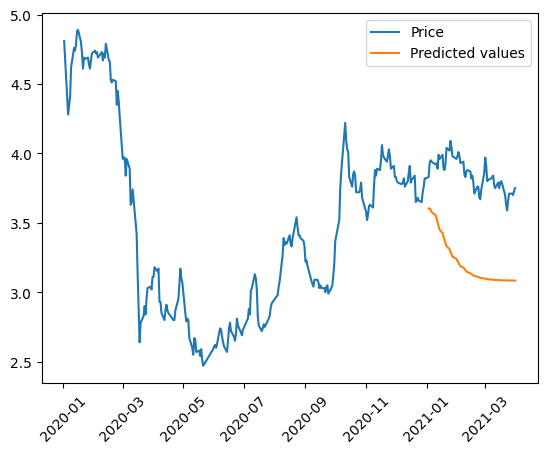

In [506]:
# plot the predictions_list
plt.plot(df['Date'], df['Price'], label ='Price')
plt.tick_params(axis='x', rotation=45)
plt.plot(df_predictions['Date'],df_predictions['Price'], label = 'Predicted values')
plt.legend()
plt.show()



# Results

Presented models focus on analysing and forecasting trends of stocks. Most of the advanced methods like LSTM, Prohpet or ARIMA can't really accuretely predict stock market trends. Therefore, the chosen method would be the simplest approach with the Moving average and Bollinger Bands. 

The more complecated methods can't predict the prices correctly due to:

1. Non-linearity and Complexity: Stock market movements are influenced by a multitude of factors, including economic indicators, geopolitical events, investor sentiment, and market psychology. The relationships between these factors and stock prices are often non-linear and complex, making it difficult for traditional forecasting models like ARIMA to capture the underlying patterns effectively.

2. Random Walk Hypothesis: The random walk hypothesis suggests that stock prices follow a random and unpredictable pattern, making it challenging to identify long-term trends and patterns. While short-term correlations might exist, predicting long-term movements accurately is elusive.

3. Efficient Market Hypothesis (EMH): The EMH posits that stock prices reflect all available information and adjust instantly to new information. In such an environment, it becomes challenging for forecasting models to outperform the market consistently.

4. Data Noisiness: Financial markets can be noisy with abrupt price changes and sudden spikes due to unexpected news or events. LSTM, Prophet, and ARIMA models may have difficulty handling such noise and incorporating it into their forecasts.

5. Limited Historical Data: LSTM and Prophet models often require a large amount of historical data to learn meaningful patterns effectively. However, stock market data is limited, especially for specific assets, and historical patterns may not necessarily repeat in the future.

6. Changing Market Conditions: Stock markets are subject to shifts in volatility, regime changes, and structural breaks. Models like ARIMA may struggle to adapt to such changing market conditions as they assume stationarity (constant statistical properties over time) in the data.

7. Overfitting: With their ability to memorize complex patterns from historical data, deep learning models like LSTM can be prone to overfitting. This means the model may perform well on historical data but fail to generalize to new, unseen data.

8. Unforeseen Events: Extraordinary events like financial crises, pandemics, or geopolitical shocks can cause significant disruptions in the stock market. These events are challenging to predict, and their impact is often not captured well by traditional forecasting models.